<a href="https://colab.research.google.com/github/michellewang1204/stock_process/blob/main/week2_api_fetch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4 requests

In [2]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-09-24 07:29:40--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-24 07:29:40--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  73.4MB/s    in 0.3s    

2024-09-24 07:29:43 (73.4 MB/s

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
import matplotlib


# **API抓取**

In [4]:
# 將民國年轉換為西元年
def convert_to_ad(date_str):
    # 將民國年轉換為西元年
    parts = date_str.split('/')
    parts[0] = str(int(parts[0]) + 1911)  # 民國轉西元 (例如 112 + 1911 = 2023)
    return '/'.join(parts)

In [5]:
# 定義函數來抓取指定月份的股票數據
def fetch_stock_data(date, stock_no):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['data'], columns=data['fields'])

In [6]:
# 股票代碼 (精誠 6214)
stock_no = "6214"

# 設定要抓取的多個月份的起始日期
dates = ["20240101", "20240201", "20240301", "20240401", "20240501", "20240601", "20240701", "20240801", "20240901"]

# 創建一個空的 DataFrame 來存放所有月份的數據
df = pd.DataFrame()

# 遍歷每個月份，抓取並合併數據
for date in dates:
    data = fetch_stock_data(date, stock_no)
    df = pd.concat([df, data], ignore_index=True)

# 資料處理，將日期轉換為正確格式
df['日期'] = df['日期'].apply(convert_to_ad)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))

print(df)


            日期     成交股數       成交金額    開盤價    最高價    最低價    收盤價 漲跌價差  成交筆數
0   2024-01-02  2661649  309048285  113.0  118.5  112.0  117.5  5.5  2497
1   2024-01-03  1335952  153561742  117.5  117.5  114.0  114.0 -3.5  1669
2   2024-01-04   668616   76063732  115.0  115.0  113.0  113.0 -1.0   688
3   2024-01-05  1383643  161109676  113.5  117.5  113.5  116.0  3.0  1360
4   2024-01-08   980442  113822219  116.5  118.0  114.5  115.5 -0.5   945
..         ...      ...        ...    ...    ...    ...    ...  ...   ...
171 2024-09-18  1706321  225654999  131.0  134.5  129.0  130.5  1.0  2343
172 2024-09-19   842851  110007585  131.5  132.0  129.5  131.0  0.5  1833
173 2024-09-20  3019354  389867930  131.5  133.0  128.0  128.0 -3.0  1267
174 2024-09-23  1055752  135353386  128.5  130.0  126.5  130.0  2.0  1009
175 2024-09-24   439562   56211736  130.0  130.0  127.0  127.0 -3.0   515

[176 rows x 9 columns]


<Figure size 1000x600 with 0 Axes>

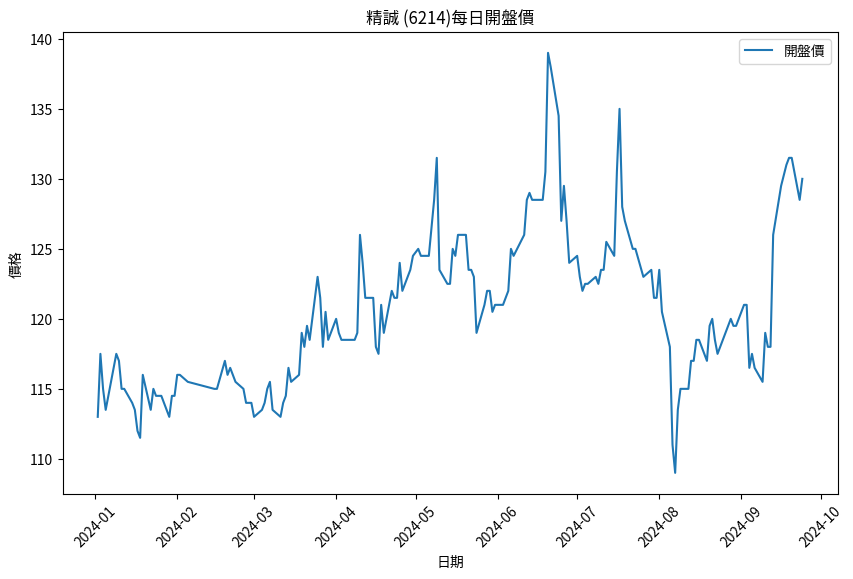

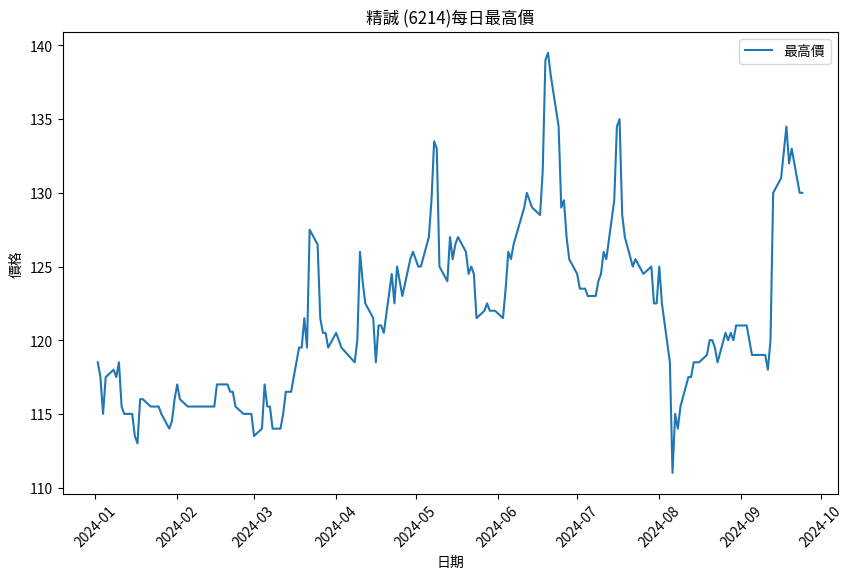

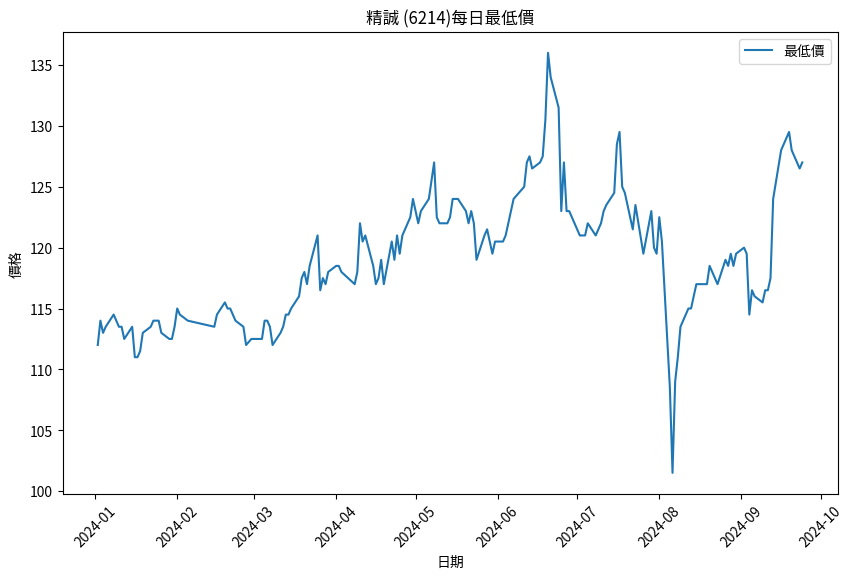

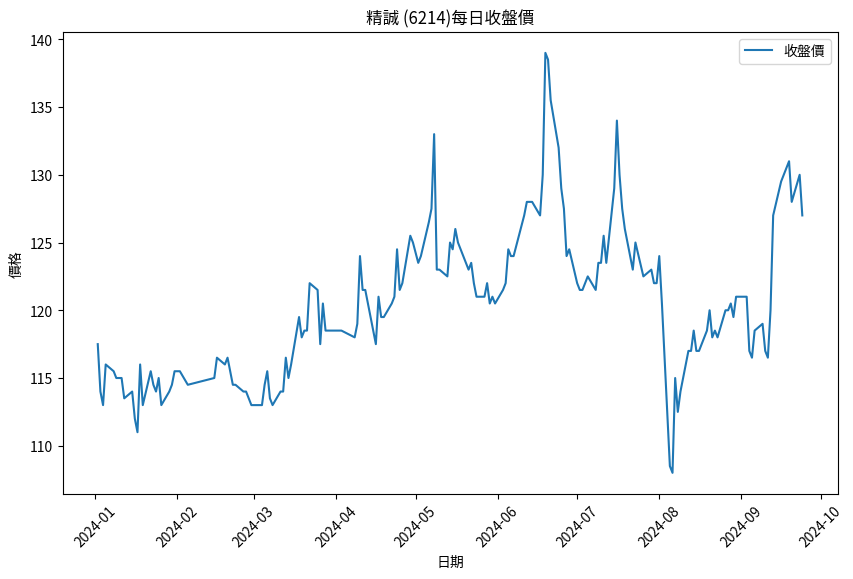

In [9]:
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

# 定義一個繪製函數
def plot_stock_data(df, column_name, label_name):
  plt.figure(figsize=(10, 6))
  plt.plot(df['日期'], df[column_name], label=label_name)
  # 設定圖表標題和軸標籤
  plt.title(f'精誠 (6214)每日{label_name}')
  plt.xlabel('日期')
  plt.ylabel('價格')
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()

# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df, '開盤價', '開盤價')
plot_stock_data(df, '最高價', '最高價')
plot_stock_data(df, '最低價', '最低價')
plot_stock_data(df, '收盤價', '收盤價')

# **Yahoo 奇摩抓取股票資料**

In [11]:
# Yahoo 奇摩的股票頁面 (精誠 6214)
url = "https://tw.stock.yahoo.com/quote/6214.TW"

# 發送請求並解析網頁
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 抓取即時股價
price_element = soup.find('span', {'class': 'Fz(32px)'})
price = price_element.text if price_element else '未找到股價'
print(f"即時股價: {price}")


即時股價: 127.0
